![Image](https://raw.githubusercontent.com/jellyfin/jellyfin-ux/master/plugins/SVG/jellyfin-plugin-tvmaze.svg?sanitize=true)

# Analyzing Tvmaze.com Data

## Calling API Rest

In [1]:
#  libraries import
import requests
import datetime
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# API call to obtain all december shows by function
url = "http://api.tvmaze.com/schedule/web?date={}"
start_date = datetime.date(2020, 12, 1)
num_days = 31
dfs = []

def api_call(url,start_date,num_days,dfs):    
    for i in range(num_days):
        date = start_date + datetime.timedelta(days=i)
        # print each day of episodes to know that each day was downloaded
        print(date)
        r_json = requests.get(url.format(date)).json()
        r_pd = pd.DataFrame.from_dict(pd.json_normalize(r_json))
        dfs.append(r_pd)
        df = pd.concat(dfs)
    return df

df = api_call(url,start_date,num_days,dfs)

2020-12-01
2020-12-02
2020-12-03
2020-12-04
2020-12-05
2020-12-06
2020-12-07
2020-12-08
2020-12-09
2020-12-10
2020-12-11
2020-12-12
2020-12-13
2020-12-14
2020-12-15
2020-12-16
2020-12-17
2020-12-18
2020-12-19
2020-12-20
2020-12-21
2020-12-22
2020-12-23
2020-12-24
2020-12-25
2020-12-26
2020-12-27
2020-12-28
2020-12-29
2020-12-30
2020-12-31


In [3]:
# all columns from downloaded JSON
print(df.columns)

Index(['id', 'url', 'name', 'season', 'number', 'type', 'airdate', 'airtime',
       'airstamp', 'runtime', 'image', 'summary', 'rating.average',
       '_links.self.href', '_embedded.show.id', '_embedded.show.url',
       '_embedded.show.name', '_embedded.show.type', '_embedded.show.language',
       '_embedded.show.genres', '_embedded.show.status',
       '_embedded.show.runtime', '_embedded.show.averageRuntime',
       '_embedded.show.premiered', '_embedded.show.ended',
       '_embedded.show.officialSite', '_embedded.show.schedule.time',
       '_embedded.show.schedule.days', '_embedded.show.rating.average',
       '_embedded.show.weight', '_embedded.show.network',
       '_embedded.show.webChannel.id', '_embedded.show.webChannel.name',
       '_embedded.show.webChannel.country.name',
       '_embedded.show.webChannel.country.code',
       '_embedded.show.webChannel.country.timezone',
       '_embedded.show.webChannel.officialSite', '_embedded.show.dvdCountry',
       '_embedded.sh

## Creating dataframes to work on

In [4]:
# first dataframe where are collected all columns related to episodes
show_episodes = df[["id","url","name","season","number",
                    "type","airdate","airtime",
                    "airstamp","runtime","image","summary",'_embedded.show.id','_embedded.show.webChannel.id','_embedded.show.network.id',
                    "rating.average","_links.self.href",
                    "_embedded.show._links.previousepisode.href",
                    "_embedded.show._links.nextepisode.href",
                    'image.medium','image.original']]

In [5]:
# second dataframe where are collected all columns related to shows
shows = df[['_embedded.show.id', '_embedded.show.url',
       '_embedded.show.name', '_embedded.show.type', '_embedded.show.language',
       '_embedded.show.genres', '_embedded.show.status',
       '_embedded.show.runtime', '_embedded.show.averageRuntime',
       '_embedded.show.premiered', '_embedded.show.ended',
       '_embedded.show.officialSite', '_embedded.show.schedule.time',
       '_embedded.show.schedule.days', '_embedded.show.rating.average',
       '_embedded.show.weight','_embedded.show.dvdCountry','_embedded.show.dvdCountry.name', 
       '_embedded.show.dvdCountry.code','_embedded.show.dvdCountry.timezone',
       '_embedded.show.externals.tvrage','_embedded.show.externals.thetvdb',
       '_embedded.show.externals.imdb','_embedded.show.image','image.medium','_embedded.show.webChannel.country.name',
       '_embedded.show.image.original','_embedded.show.summary','_embedded.show.updated',
       '_embedded.show._links.self.href']]

In [6]:
# third dataframe where are collected all columns related to web channels of shows
web_channels = df[['_embedded.show.webChannel.id', '_embedded.show.webChannel',
                   '_embedded.show.webChannel.name',
                   '_embedded.show.webChannel.country',
                   '_embedded.show.webChannel.country.name','_embedded.show.id',
                   '_embedded.show.webChannel.country.code',
                   '_embedded.show.webChannel.country.timezone',
                   '_embedded.show.webChannel.officialSite']]

In [7]:
## fourth dataframe where are collected all columns related to networks of shows
networks = df[['_embedded.show.network', '_embedded.show.network.id',
       '_embedded.show.network.name', '_embedded.show.network.country.name','_embedded.show.id',
       '_embedded.show.network.country.code',
       '_embedded.show.network.country.timezone',
       '_embedded.show.network.officialSite']]

## Dataframes Profiling 

In [8]:
installing profiling on jupyter notebook
!pip install pandas-profiling[notebook]

In [9]:
# importing pandas profiling libraries
import pandas_profiling
from pandas_profiling.utils.cache import cache_file

In [10]:
# defining profiling variables for each dataframe

show_episodes_report = show_episodes.profile_report(sort = 'descending')
shows_report = shows.profile_report(sort = 'descending')
web_channels_report = web_channels.profile_report(sort = 'descending')
networks_channels_report = networks.profile_report(sort = 'descending')

In [11]:
#saving all profiling reports as html files
show_episodes_report.to_file(output_file = "show_episodes_report_profiling")
shows_report.to_file(output_file = "shows_report_profiling")
web_channels_report.to_file(output_file = "web_channels_report_profiling")
networks_channels_report.to_file(output_file = "networks_channels_report_profiling")

# Data cleaning

In [12]:
# After data analysis the will we rename the next columns for the dataframe show_episodes
show_episodes = show_episodes.rename(columns=
                     {'rating.average':'rating_average','_links.self.href':'episode_api_link',
                     '_embedded.show._links.previousepisode.href':'previous_episode',
                     '_embedded.show._links.nextepisode.href':'next_episode',
                     'image.medium':'image_medium','image.original':'image_original','_embedded.show.id':'show_id',
                      '_embedded.show.webChannel.id':'webchannel_id','_embedded.show.network.id':'network_id'
                     }) 

In [13]:
# the columns with new names, they are shorter than before
print(show_episodes.columns)

Index(['id', 'url', 'name', 'season', 'number', 'type', 'airdate', 'airtime',
       'airstamp', 'runtime', 'image', 'summary', 'show_id', 'webchannel_id',
       'network_id', 'rating_average', 'episode_api_link', 'previous_episode',
       'next_episode', 'image_medium', 'image_original'],
      dtype='object')


In [14]:
# changing data type for datetime columns
show_episodes["airdate"] = pd.to_datetime(show_episodes["airdate"])
show_episodes["airtime"] = pd.to_datetime(show_episodes["airtime"])
show_episodes["airstamp"] = pd.to_datetime(show_episodes["airstamp"])

In [15]:
# showing new dtype
print(show_episodes.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082 entries, 0 to 131
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id                3082 non-null   int64              
 1   url               3082 non-null   object             
 2   name              3082 non-null   object             
 3   season            3082 non-null   int64              
 4   number            3001 non-null   float64            
 5   type              3082 non-null   object             
 6   airdate           3082 non-null   datetime64[ns]     
 7   airtime           923 non-null    datetime64[ns]     
 8   airstamp          3082 non-null   datetime64[ns, UTC]
 9   runtime           2854 non-null   float64            
 10  image             0 non-null      float64            
 11  summary           886 non-null    object             
 12  show_id           3082 non-null   int64              
 13  webc

In [16]:
# we cannot drop the column rating_average because 
# of nulls since we will lose so much data, and we cannot replace it with 0 or average
# we will keep all the columns except the image column because it is all null
show_episodes = show_episodes.drop('image', axis=1)

In [17]:
# for the second dataframe "shows" we will rename columns at first making all columns names shorter and lowercase
shows = shows.rename(columns=
                     {
                     '_embedded.show.id':'id','_embedded.show.url':'url',
                     '_embedded.show.name':'name','_embedded.show.type':'type',
                     '_embedded.show.language':'language','_embedded.show.genres':'genres',
                     '_embedded.show.status':'status','_embedded.show.runtime':'runtime',
                     '_embedded.show.averageRuntime':'average_runtime','_embedded.show.premiered':'premiered',
                     '_embedded.show.ended':'ended','_embedded.show.officialSite':'officialsite',
                     '_embedded.show.schedule.time':'time','_embedded.show.schedule.days':'days',
                     '_embedded.show.rating.average':'rating_average','_embedded.show.weight':'weight',
                     '_embedded.show.dvdCountry':'dvdcountry','_embedded.show.dvdCountry.name':'dvdcountry_name',
                     '_embedded.show.dvdCountry.code':'dvdcountry_code','_embedded.show.dvdCountry.timezone':'dvdcountry_timezone',
                     '_embedded.show.externals.tvrage':'tvrage_external_id','_embedded.show.externals.thetvdb':'thetvdb_external_id',
                     '_embedded.show.externals.imdb':'imdb_external_id','_embedded.show.image':'image',
                     'image.medium':'image_medium', '_embedded.show.image.original':'image_original',
                     '_embedded.show.summary':'summary','_embedded.show.updated':'updated','_embedded.show.webChannel.country.name':'country_name',
                     '_embedded.show._links.self.href':'show_api_link'
                     }
                    )

In [18]:
# the columns with new names, they are shorter than before
print(shows.columns)

Index(['id', 'url', 'name', 'type', 'language', 'genres', 'status', 'runtime',
       'average_runtime', 'premiered', 'ended', 'officialsite', 'time', 'days',
       'rating_average', 'weight', 'dvdcountry', 'dvdcountry_name',
       'dvdcountry_code', 'dvdcountry_timezone', 'tvrage_external_id',
       'thetvdb_external_id', 'imdb_external_id', 'image', 'image_medium',
       'country_name', 'image_original', 'summary', 'updated',
       'show_api_link'],
      dtype='object')


In [19]:
# changing data type for datetime columns
shows["premiered"] = pd.to_datetime(shows["premiered"])
shows["ended"] = pd.to_datetime(shows["ended"])

In [20]:
# showing new dtype
print(shows.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082 entries, 0 to 131
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   3082 non-null   int64         
 1   url                  3082 non-null   object        
 2   name                 3082 non-null   object        
 3   type                 3082 non-null   object        
 4   language             3048 non-null   object        
 5   genres               3082 non-null   object        
 6   status               3082 non-null   object        
 7   runtime              2065 non-null   float64       
 8   average_runtime      2913 non-null   float64       
 9   premiered            3082 non-null   datetime64[ns]
 10  ended                1383 non-null   datetime64[ns]
 11  officialsite         2674 non-null   object        
 12  time                 3082 non-null   object        
 13  days                 3082 non-null

In [21]:
# we will drop all columns with most nulls values except ids to other dataframes
shows = shows.drop(['dvdcountry','dvdcountry_name','dvdcountry_code','dvdcountry_timezone',
                    'tvrage_external_id','image','image_medium'], axis=1)

In [22]:
#final columns
print(shows.columns)

Index(['id', 'url', 'name', 'type', 'language', 'genres', 'status', 'runtime',
       'average_runtime', 'premiered', 'ended', 'officialsite', 'time', 'days',
       'rating_average', 'weight', 'thetvdb_external_id', 'imdb_external_id',
       'country_name', 'image_original', 'summary', 'updated',
       'show_api_link'],
      dtype='object')


In [23]:
#transforming list of genres to string
shows['genres'] = shows['genres'].apply(lambda x: ','.join(map(str, x)))

In [24]:
# for the next dataframe "web_channels" we will rename columns at first making all columns names shorter and lowercase
web_channels = web_channels.rename(columns=
                     {'_embedded.show.webChannel':'webchannel',
                      '_embedded.show.webChannel.id':'id',
                      '_embedded.show.webChannel.name':'name',
                     '_embedded.show.webChannel.country':'country',
                     '_embedded.show.webChannel.country.name':'country_name',
                     '_embedded.show.webChannel.country.code':'country_code',
                     '_embedded.show.webChannel.country.timezone':'country_timezone',
                     '_embedded.show.webChannel.officialSite':'officialsite'
                     }
                                  ) 

In [25]:
# checking dtype and null values
# all dtype are according to variables
print(web_channels.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082 entries, 0 to 131
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2997 non-null   float64
 1   webchannel         0 non-null      float64
 2   name               2997 non-null   object 
 3   country            0 non-null      float64
 4   country_name       1509 non-null   object 
 5   _embedded.show.id  3082 non-null   int64  
 6   country_code       1509 non-null   object 
 7   country_timezone   1509 non-null   object 
 8   officialsite       1810 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 240.8+ KB
None


In [26]:
# in this step we will delete the column name which is completelly null
web_channels = web_channels.drop(['country','webchannel'], axis=1)

In [27]:
#checking duplicate rows
web_channels.duplicated(subset=None, keep='first').sum()
# deleting duplicate columns and keeping the first one
web_channels = web_channels.drop_duplicates(keep='first')

In [28]:
# we do not get duplicate rows 
web_channels.duplicated(subset=None, keep='first').sum()

0

In [29]:
#checking null values in id column
web_channels["id"].isnull().sum()

18

In [30]:
#deleting null values in id column
web_channels = web_channels.dropna(axis=0, subset=['id'], how="any", thresh=1)
#checking that null values = 0
web_channels["id"].isnull().sum()

0

In [31]:
# the last one dataframe "networks" we will rename the columns and then check dtypes
networks = networks.rename(columns=
                     {'_embedded.show.network':'network',
                      '_embedded.show.network.id':'id',
                      '_embedded.show.network.name':'name',
                     '_embedded.show.network.country.name':'country_name',
                     '_embedded.show.network.country.code':'country_code',
                     '_embedded.show.network.country.timezone':'country_timezone',
                     '_embedded.show.network.officialSite':'officialsite'
                     }
                                  ) 

In [32]:
# checking dtype and null values
# all dtype are according to variables
print(networks.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082 entries, 0 to 131
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   network            0 non-null      float64
 1   id                 217 non-null    float64
 2   name               217 non-null    object 
 3   country_name       217 non-null    object 
 4   _embedded.show.id  3082 non-null   int64  
 5   country_code       217 non-null    object 
 6   country_timezone   217 non-null    object 
 7   officialsite       7 non-null      object 
dtypes: float64(2), int64(1), object(5)
memory usage: 216.7+ KB
None


In [33]:
#we will delete the column network which is completelly null
networks = networks.drop('network', axis=1)

In [34]:
#checking duplicate rows
networks.duplicated(subset=None, keep='first').sum()
# deleting duplicate columns and keeping the first one
networks = networks.drop_duplicates(keep='first')

In [35]:
# we do not get duplicate rows 
networks.duplicated(subset=None, keep='first').sum()

0

In [36]:
#checking null values in id column
networks["id"].isnull().sum()

#deleting null values in id column
networks = networks.dropna(axis=0, subset=['id'], how="any", thresh=1)

In [37]:
#checking that null values = 0
networks["id"].isnull().sum()

0

## Creating database in sqlite with the dataframes as tables

In [38]:
# importing sqlite library
import sqlite3 as sql

In [39]:
# function to create database to load the tables
def createdb(db_name):
    conn = sql.connect(db_name)
    conn.commit()
    conn.close()
    
# function to connect to database, transform dataframe to sql and then create table in sqlite
def createtable(db_name,dataframe,table_name):
    conn = sql.connect(db_name)
    cursor = conn.cursor()
    dataframe.to_sql("{}".format(table_name), conn, if_exists="replace", index=False)
    conn.commit()
    conn.close()

In [40]:
# Creating database
createdb("mazetv.db")

In [41]:
# cast all values to str to avoid error at export as table in sql lite and deleting duplicates
shows_1 = shows.applymap(str)
shows_1 = shows_1.drop_duplicates(keep='first')

In [42]:
#creating tables in database 

createtable("mazetv.db",show_episodes,"tbl_show_episodes")
createtable("mazetv.db",shows_1,"tbl_shows")
createtable("mazetv.db",web_channels,"tbl_web_channels")
createtable("mazetv.db",networks,"tbl_networks")
print(shows["officialsite"].head())

## Plots

Ploting average runtime by type per month in 2020 year

In [43]:
# creating dataframe to plot with shows in december
df_to_plot = shows.loc[(shows['premiered']>='2020-01-01') & (shows['premiered']<'2021-01-01'), ['premiered','average_runtime', 'type','id']]
df_to_plot['premiered'] = df_to_plot['premiered'].dt.to_period('M')
df_to_plot = df_to_plot.drop_duplicates(keep='first')
df_to_plot = df_to_plot.sort_values('premiered')
df_to_plot = df_to_plot.groupby(['premiered','type'])['average_runtime'].sum().reset_index()

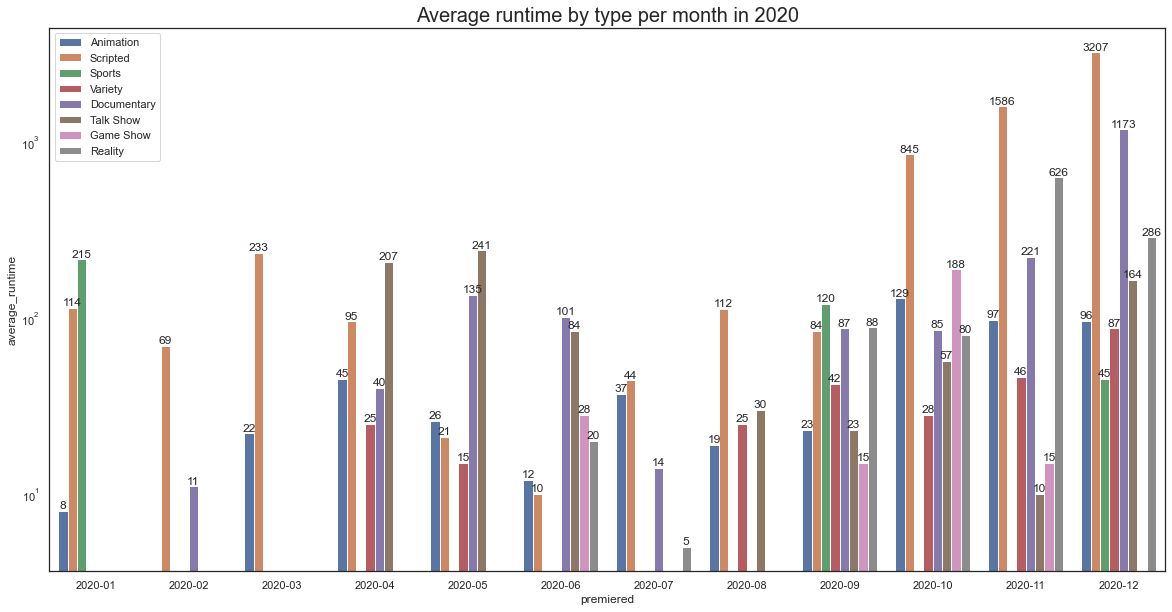

In [44]:
#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart on logarithm scale due to values difference
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
plot = sns.barplot(x='premiered', y='average_runtime', hue="type", data=df_to_plot)
plot = plot.set(yscale="log")
plt.title('Average runtime by type per month in 2020', fontsize=20)
plt.legend(title='Typrd', fontsize=20)
plt.legend(loc='upper left')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

Ploting number of series by genre per month in 2020 year

In [45]:
# function to plot multiple bar graphs
def plot_multiple(df, date_1,date_2,x_axis,y_axis,hue):
    
    df_to_plot = df.loc[(df[x_axis]>=date_1) & (df[x_axis]<date_2), [x_axis, y_axis, hue]]
    df_to_plot[x_axis] = df_to_plot[x_axis].dt.to_period('M')
    df_to_plot = df_to_plot.assign(genres=df_to_plot.genres.str.split(',')).explode(hue).reset_index(drop=True)
    df_to_plot = df_to_plot.drop_duplicates(keep='first')
    df_to_plot = df_to_plot.groupby([x_axis,hue])[y_axis].count().reset_index()
    df_to_plot = df_to_plot.rename(columns= {y_axis:'number of series'})
    df_to_plot = df_to_plot.sort_values(x_axis)
    g = sns.catplot(x =hue, y = 'number of series', col=x_axis, data=df_to_plot, kind="bar")
    g.set_xticklabels(rotation=90)
    return plt.show()

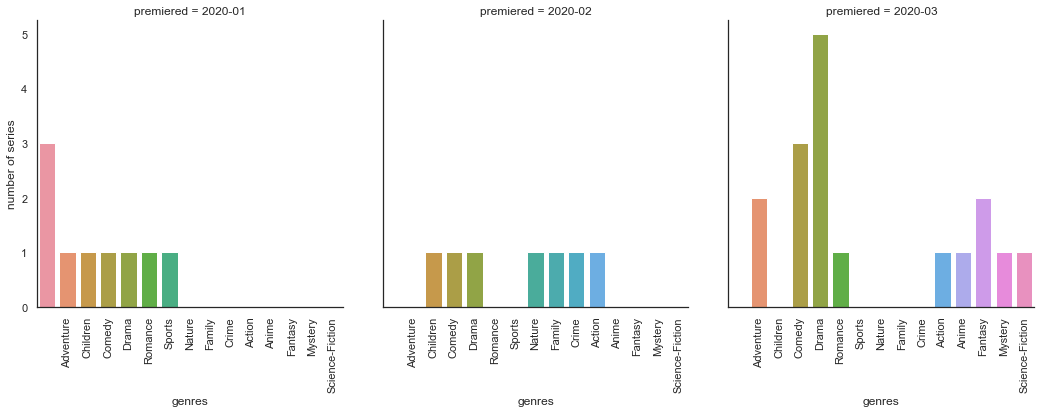

In [46]:
plot_multiple(shows,'2020-01-01','2020-04-01','premiered','id','genres')

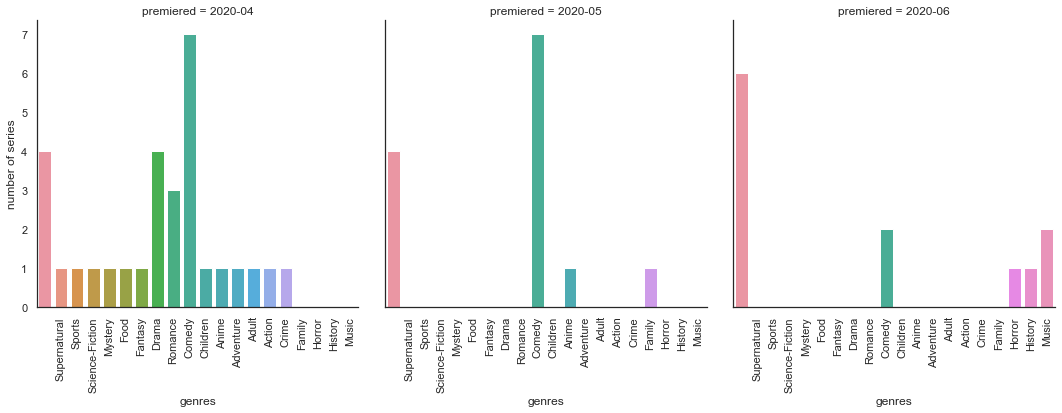

In [47]:
plot_multiple(shows,'2020-04-01','2020-07-01','premiered','id','genres')

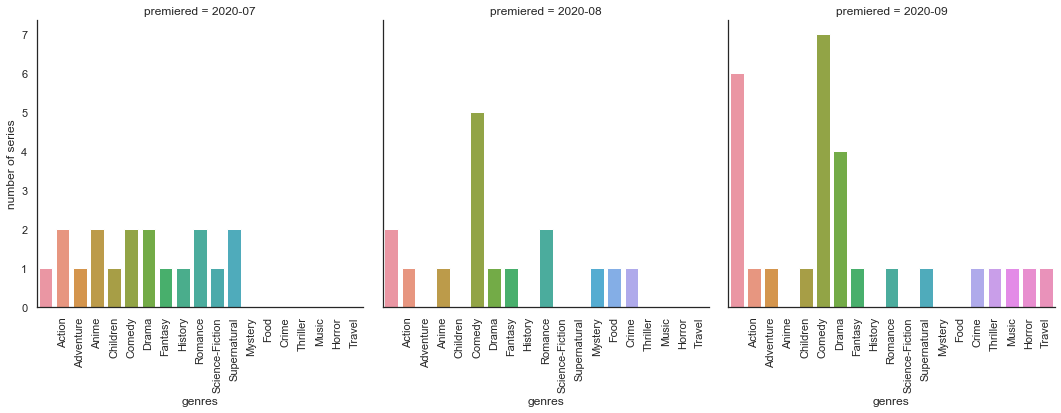

In [48]:
plot_multiple(shows,'2020-07-01','2020-10-01','premiered','id','genres')

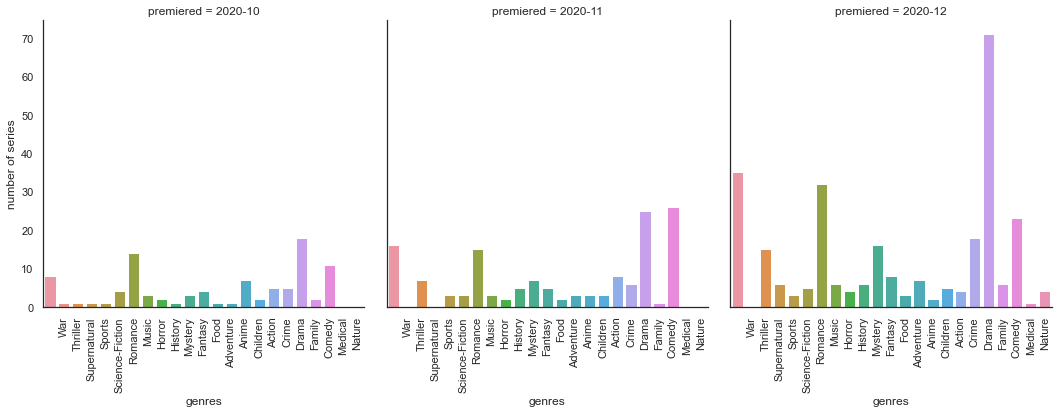

In [49]:
plot_multiple(shows,'2020-10-01','2021-01-01','premiered','id','genres')

Ploting number of series by country per month in 2020 year

In [50]:
# function to plot multiple bar graphs
def plot_multiple(df, date_1,date_2,x_axis,y_axis,hue):
    
    df_to_plot = df.loc[(df[x_axis]>=date_1) & (df[x_axis]<date_2), [x_axis, y_axis, hue]]
    df_to_plot[x_axis] = df_to_plot[x_axis].dt.to_period('M')
    df_to_plot = df_to_plot.drop_duplicates(keep='first')
    df_to_plot = df_to_plot.groupby([x_axis,hue])[y_axis].count().reset_index()
    df_to_plot = df_to_plot.rename(columns= {y_axis:'number of series'})
    df_to_plot = df_to_plot.sort_values(x_axis)
    g = sns.catplot(x =hue, y = 'number of series', col=x_axis, data=df_to_plot, kind="bar")
    g.set_xticklabels(rotation=90)
    return plt.show()

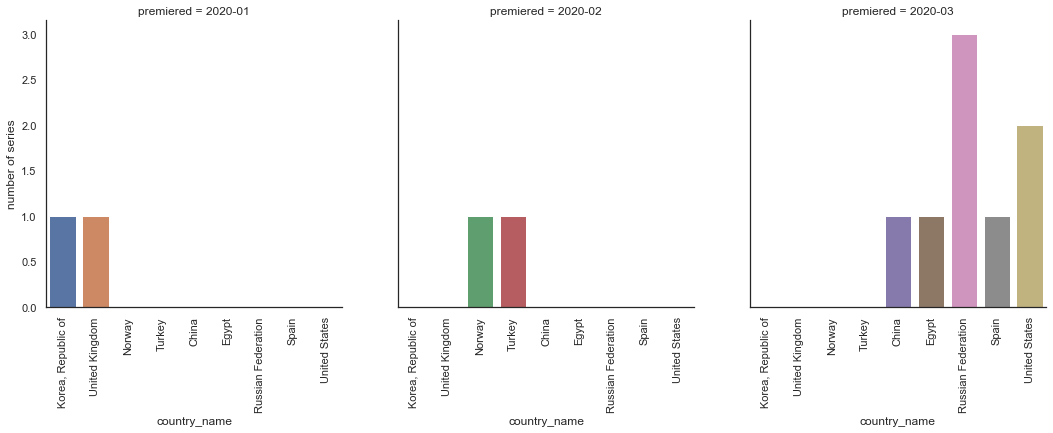

In [51]:
plot_multiple(shows,'2020-01-01','2020-04-01','premiered','id','country_name')

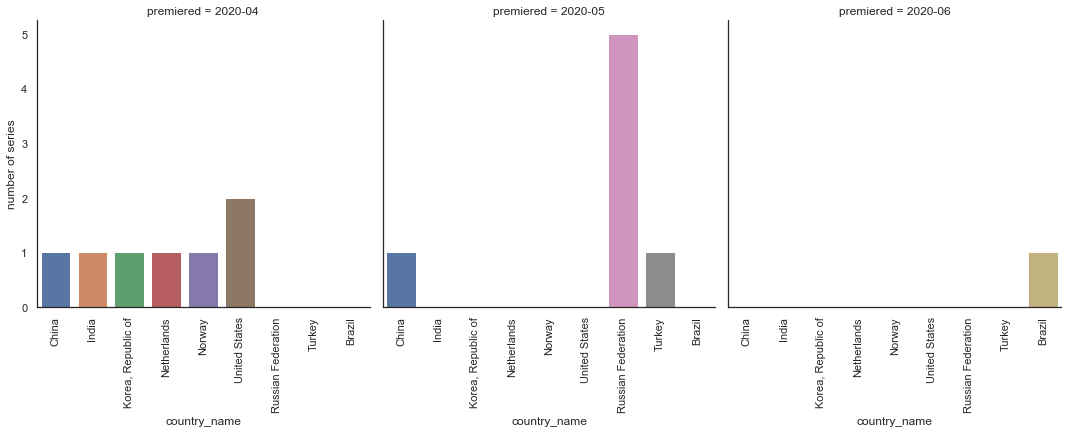

In [52]:
plot_multiple(shows,'2020-04-01','2020-07-01','premiered','id','country_name')

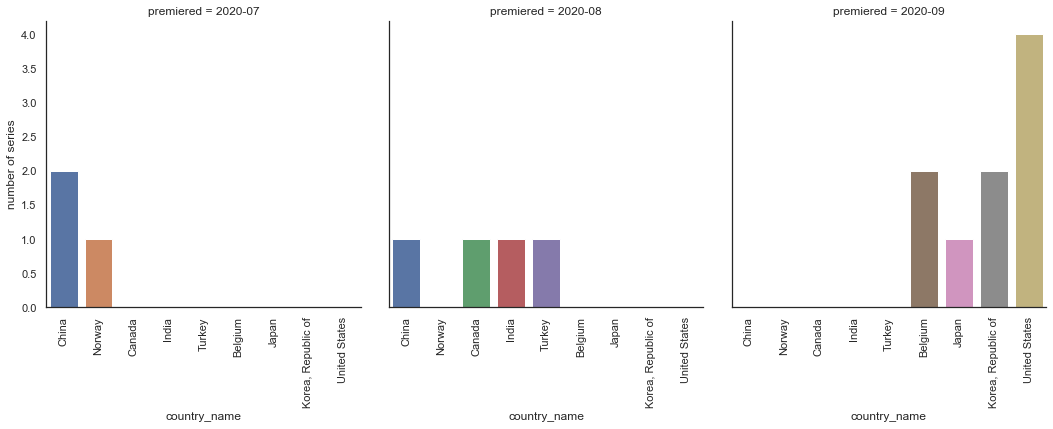

In [53]:
plot_multiple(shows,'2020-07-01','2020-10-01','premiered','id','country_name')

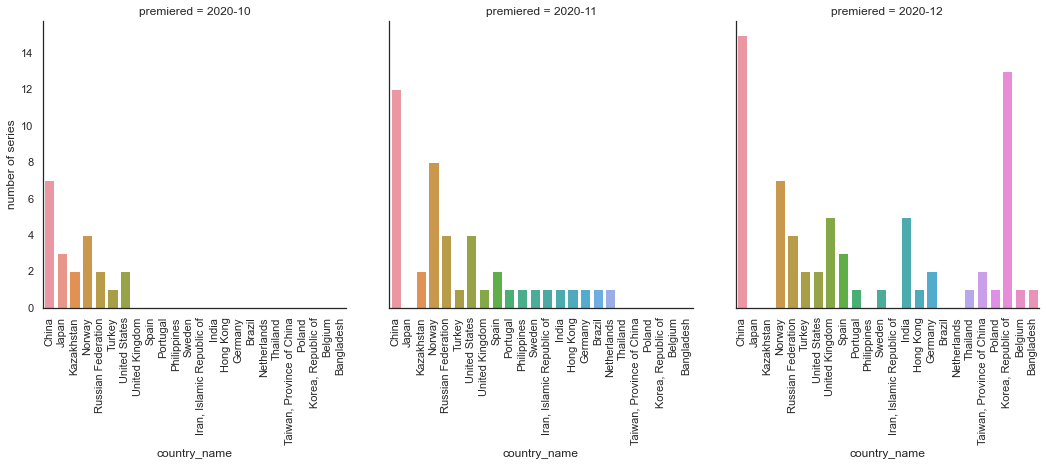

In [54]:
plot_multiple(shows,'2020-10-01','2021-01-01','premiered','id','country_name')

ploting rating average by country per month in 2020 year

In [55]:
# function to plot multiple bar graphs
def plot_multiple(df, date_1,date_2,x_axis,y_axis,hue):
    
    df_to_plot = df.loc[(df[x_axis]>=date_1) & (df[x_axis]<date_2), [x_axis, y_axis, hue,'id']]
    df_to_plot[x_axis] = df_to_plot[x_axis].dt.to_period('M')
    df_to_plot = df_to_plot.drop_duplicates(keep='first')
    df_to_plot = df_to_plot.groupby([x_axis,hue])[y_axis].mean().reset_index()
    df_to_plot = df_to_plot.sort_values(x_axis)
    fig_dims = (20, 10)
    fig, ax = plt.subplots(figsize=fig_dims)
    plot = sns.barplot(x=x_axis, y=y_axis, hue=hue, data=df_to_plot)
    # plot = plot.set(yscale="log")
    plt.title('Rating average by country per month in 2020', fontsize=20)
    plt.legend(title='Country', fontsize=20)
    plt.legend(loc='upper left')
    for i in ax.containers:
        ax.bar_label(i,)
    plt.show()
    return plt.show()

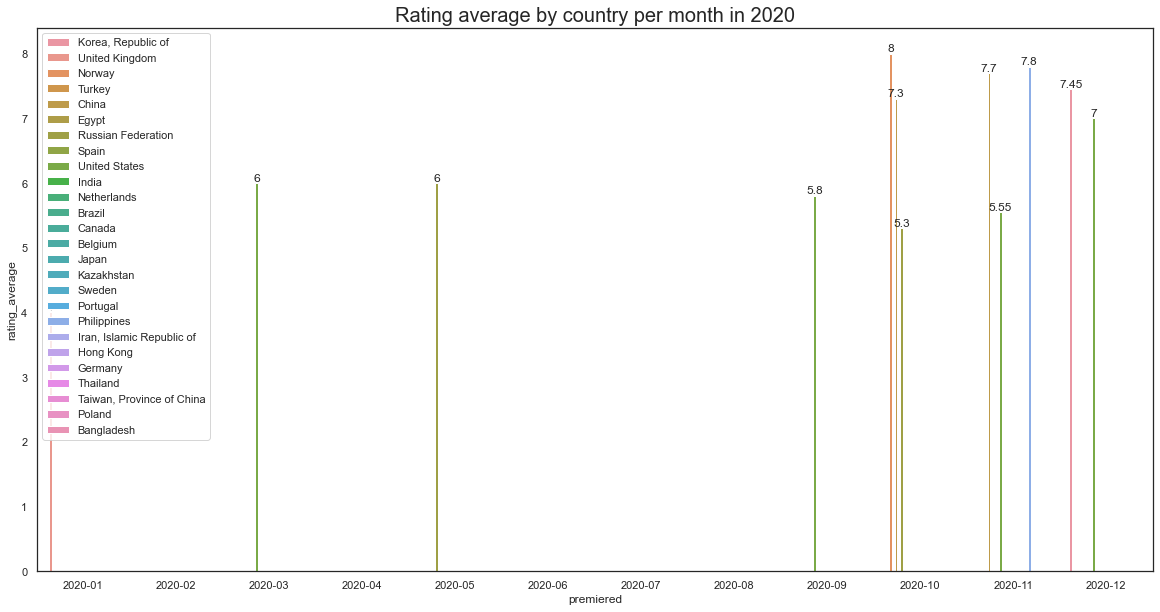

In [56]:
plot_multiple(shows,'2020-01-01','2021-01-01','premiered','rating_average','country_name')

ploting rating average by genre per month in 2020 year

In [57]:
# function to plot multiple bar graphs
def plot_multiple(df, date_1,date_2,x_axis,y_axis,hue):
    
    df_to_plot = df.loc[(df[x_axis]>=date_1) & (df[x_axis]<date_2), [x_axis, y_axis, hue]]
    df_to_plot[x_axis] = df_to_plot[x_axis].dt.to_period('M')
    df_to_plot = df_to_plot.assign(genres=df_to_plot[hue].str.split(',')).explode(hue).reset_index(drop=True)
    df_to_plot = df_to_plot.drop_duplicates(keep='first')
    df_to_plot = df_to_plot.groupby([x_axis,hue])[y_axis].mean().reset_index()
    df_to_plot = df_to_plot.sort_values(x_axis)
    g = sns.catplot(x =hue, y = y_axis, col=x_axis, data=df_to_plot, kind="bar")
    g.set_xticklabels(rotation=90)
    return plt.show()

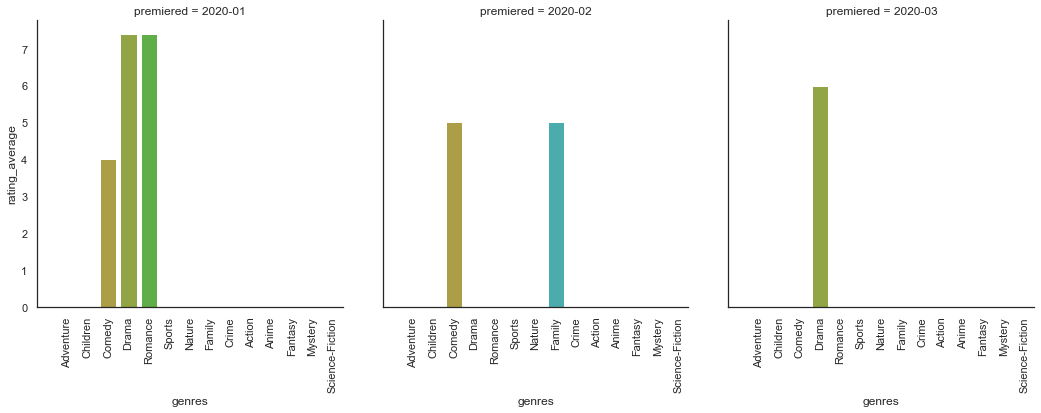

In [58]:
plot_multiple(shows,'2020-01-01','2020-04-01','premiered','rating_average','genres')

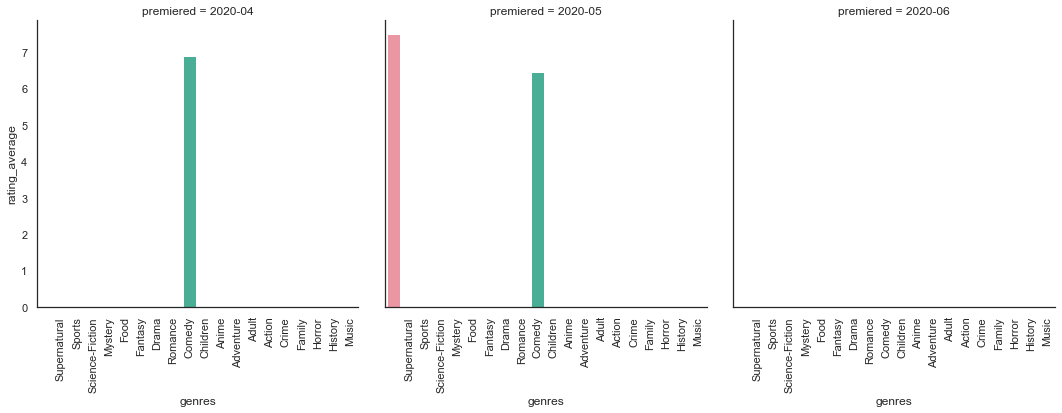

In [59]:
plot_multiple(shows,'2020-04-01','2020-07-01','premiered','rating_average','genres')

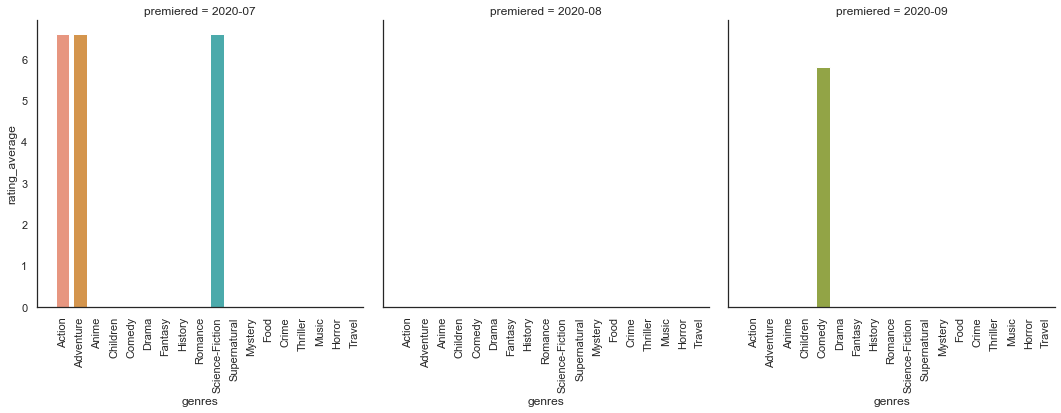

In [60]:
plot_multiple(shows,'2020-07-01','2020-10-01','premiered','rating_average','genres')

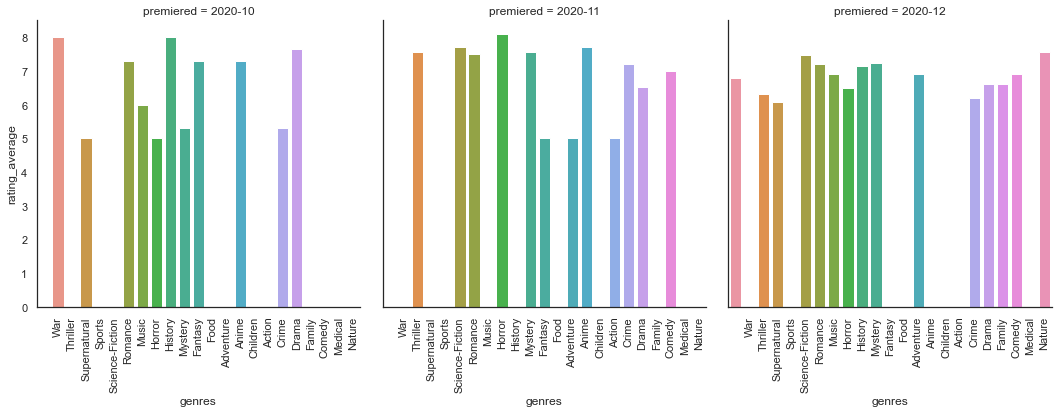

In [61]:
plot_multiple(shows,'2020-10-01','2021-01-01','premiered','rating_average','genres')